# Project COMP 262
## Natural Language processing and recommender systems

School of Engineering Technology and Applied Science

Information and Communication Engineering Technology

23F --Natural Language & Recom Sys (SEC. 001) - COMP262001_2023F

Team #5:

1. Ronald Saenz - 301218602
2. Manipal Sidhu - 300859319
3. Radmy Rafia Mahpara - 301176893
4. Kanishka Dhir - 301220757

## Team #5: Gift cards

# PHASE 2


Phase #2

10. Modeling (Sentiment Analysis) Machine Learning approach:

    a. Split the data into 70% for training and 30% for testing,—Use stratified splitting based on the rating value field.
    
    b. Build two sentiment analysis models using 70% of the data. Choose two of the following Machine Learning algorithms to build your models:
    
        i. Logistic Regression
        ii. SVM
        iii. Naïve Bayes
        iv. Gradient Boosting
        
        
11. Note the results of the training process.


12. Testing: Test out the two models using the 30% test data note the accuracy, precision, recall and F1 score.

13. Design an experiment to compare the test results of the Lexicon model versus the two machine learning models:

    a. Prepare the data: Here you will need to create a situation where you compare
    apples to apples, so whatever you test on Lexicon should be the test data for
    your machine learing model, this step requires good design.
    
    b. Run both models on the same data and compare the results using appropriate
    matrics.
    
    
14. Review the attached paper “Recommender systems based on user reviews: the state of the art”, can also be accessed at the centennial library. Examining the options presented in the paper carryout the following:

    a. Explain how you can enhance the rating values of your data using the review data.
    
    b. Choose one of the suggested options, provide diagrams and pseudo-code.
    
    c. Implement the suggestion on your dataset.(Code needs to be provided)
    

In [1]:
!pip install contractions
!pip install vaderSentiment
!pip install textblob

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

# Imbalance datasets
from imblearn.over_sampling  import RandomOverSampler

In [3]:
# Set the random seed

random_state = 2
np.random.seed(random_state)

In [4]:
# Configuration by default
pd.set_option("max_colwidth", None)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Load Data

In [5]:
# Load dataset

df = pd.read_json("Gift_Cards_5.json", lines=True)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN
2968,4,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN
2969,5,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift,1528416000,NaN,NaN
2970,5,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN


## Basic Preprocessing

In [6]:
# Keep the verified reviews

#removing all the non-verified reviews
df = df[df['verified'] == True]

# combining 'reviewText' and 'summary' column into a new column 'text'
df['text'] = df['reviewText'].astype(str) + ' ' + df['summary'].astype(str)

#dropping unwanted columns
df = df.drop(columns=['verified','reviewerID', 'asin', 'reviewerName','reviewTime', 'style', 'unixReviewTime', 'vote', 'image', 'reviewText', 'summary'])

df_size_before = df.shape[0]
df

<ipython-input-6-0359b899f912>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['reviewText'].astype(str) + ' ' + df['summary'].astype(str)


,overall,text
0,5,Another great gift. Five Stars
1,4,Gift card for my daughter Ease of use
2,5,Nice present Five Stars
3,5,My niece loved this birthday greeting/gift card. Love the convenience of eCards
4,5,fine as a gift. Five Stars
...,...,...
2967,5,"Not much to say, gift card is as good as cash! gift card is as good as cash"
2968,4,Nice gift card Four Stars
2969,5,Gift Great Gift
2970,5,Pretty good! Pretty good!


In [7]:
# Drop duplicates
df = df.drop_duplicates()

df_size_after = df.shape[0]

df

,overall,text
0,5,Another great gift. Five Stars
1,4,Gift card for my daughter Ease of use
2,5,Nice present Five Stars
3,5,My niece loved this birthday greeting/gift card. Love the convenience of eCards
4,5,fine as a gift. Five Stars
...,...,...
2963,5,Enjoyed by recipient and nice that it can be used at multiple stores. Five Stars
2964,5,Christmas stocking gift. Loved it Arrives fast
2965,5,Perfect gift for any occasion Five Stars
2966,5,This was bought from me--no complaints. Very cute! Adorable!


In [8]:
print('Number of duplicated rows:', df_size_before - df_size_after)

Number of duplicated rows: 892


In [9]:
#Labelling data from Overall Ratings
def label_rating(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"


df['label'] = df['overall'].apply(label_rating)
df

<ipython-input-9-67ae73535ad5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['overall'].apply(label_rating)


,overall,text,label
0,5,Another great gift. Five Stars,Positive
1,4,Gift card for my daughter Ease of use,Positive
2,5,Nice present Five Stars,Positive
3,5,My niece loved this birthday greeting/gift card. Love the convenience of eCards,Positive
4,5,fine as a gift. Five Stars,Positive
...,...,...,...
2963,5,Enjoyed by recipient and nice that it can be used at multiple stores. Five Stars,Positive
2964,5,Christmas stocking gift. Loved it Arrives fast,Positive
2965,5,Perfect gift for any occasion Five Stars,Positive
2966,5,This was bought from me--no complaints. Very cute! Adorable!,Positive


In [10]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1946, 3)


## Preprocessing for ML models

In [11]:
# Sample of 200 registers for validation

text_df, sample_df = train_test_split(df, test_size=200,stratify=df['label'], random_state=random_state)

print("Shape of dataset:", text_df.shape)
print("Shape of dataset:", sample_df.shape)

Shape of dataset: (1746, 3)
Shape of dataset: (200, 3)


In [12]:
# Pre-processing required to apply in ML models

def preprocessing_text_for_ml(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass

    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    #lower case corpus
    text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])

    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    custom_stopwords = stop_words - {'not', 'no', 'nor', 'but', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


In [13]:
# Applying pre-processing for dataframe for ML

text_df['text_preprocessed'] = text_df['text'].apply(preprocessing_text_for_ml)
text_df.head(20)

,overall,text,label,text_preprocessed
494,5,Son loved this! Five Stars,Positive,son loved five star
1281,3,"I thought this would be a hit for several people but not so. The quality differs tremendously by store. For instance, the one in Highlands, N. C. is excellent - ingredients always fresh; very clean, etc. We stopped at several in Fla. and were very disappointed. The veggies looks ""whipped out"" and the over-all ambience of the place was negative. No ore SUBWAY gift certs. Bummer",Neutral,thought would hit several people but not quality differs tremendously store instance one highland n c excellent ingredient always fresh clean etc stopped several fla disappointed veggie look whipped overall ambience place negative no ore subway gift cert bummer
1243,5,Works as advertised Works as advertised,Positive,work advertised work advertised
2242,5,Love it thank u,Positive,love thank
2185,4,"easy to use on their website, for a great online quick pick up. There food was okay, but not for the price. Easy to use",Positive,easy use website great online quick pick food okay but not price easy use
493,5,great gift! Five Stars,Positive,great gift five star
2260,5,"Gave this to my Mom for a Christmas gift, and she loves it. Why got to the store to buy it, when I can have it delivered? Great gift",Positive,gave mom christmas gift love got store buy delivered great gift
116,5,Is as advertised Five Stars,Positive,advertised five star
2596,5,My teenaged granddaughter loved it. Adorable Amazon gift card holder.,Positive,teenaged granddaughter loved adorable amazon gift card holder
1060,5,Easy to purchase -great gift Five Stars,Positive,easy purchase great gift five star


In [14]:
# Get the new X, y Values

text_df_X = text_df['text_preprocessed']
text_df_y = text_df['label']

print("Shape of DF data (X) (y):", text_df_X.shape, text_df_y.shape)

Shape of DF data (X) (y): (1746,) (1746,)


In [15]:
# 10.a. Split the data into 70% for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(text_df_X, text_df_y, test_size=0.3, stratify=text_df_y, random_state=random_state)


In [16]:
print("Shape of training data (X) (y):", X_train.shape, y_train.shape)
print("Shape of testing data (X) (y):", X_test.shape, y_test.shape)

Shape of training data (X) (y): (1222,) (1222,)
Shape of testing data (X) (y): (524,) (524,)


In [17]:
# Print the number of samples in each set

print(f"# original samples: {len(y_train)}")

# Print the number of images per person in each test

original_counts = Counter(y_train)
print("Counter of original set", original_counts)

# original samples: 1222
Counter of original set Counter({'Positive': 1188, 'Neutral': 19, 'Negative': 15})


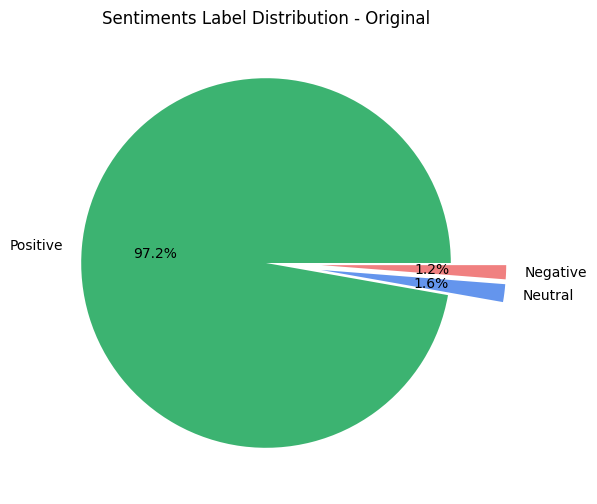

In [18]:
# Sentiments Label Distribution - Original

sorted_counts = dict(sorted(original_counts.items(), key=lambda item: item[1], reverse=True))
explode_values = [0, 0.3, 0.3]
colors = ['mediumseagreen', 'cornflowerblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(sorted_counts.values(), labels=sorted_counts.keys(), colors=colors, autopct='%1.1f%%', explode=explode_values)
ax.set_title('Sentiments Label Distribution - Original')
ax.yaxis.set_visible(False)
plt.show()

In [19]:
# Apply Feature extraction using TF-IDF

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
# Oversampling to balance the data using minority to increase

sampler = RandomOverSampler(random_state=random_state)

# Resample the data
X_train_tfidf_resampled, y_train_resampled = sampler.fit_resample(X_train_tfidf, y_train)

# Print the number of samples in each set after resampling
print(f"# resampled samples: {len(y_train_resampled)}")

# Print the number of samples per class after resampling
resampled_counts = Counter(y_train_resampled)
print("Counter of resampled set", resampled_counts)

# resampled samples: 3564
Counter of resampled set Counter({'Positive': 1188, 'Neutral': 1188, 'Negative': 1188})


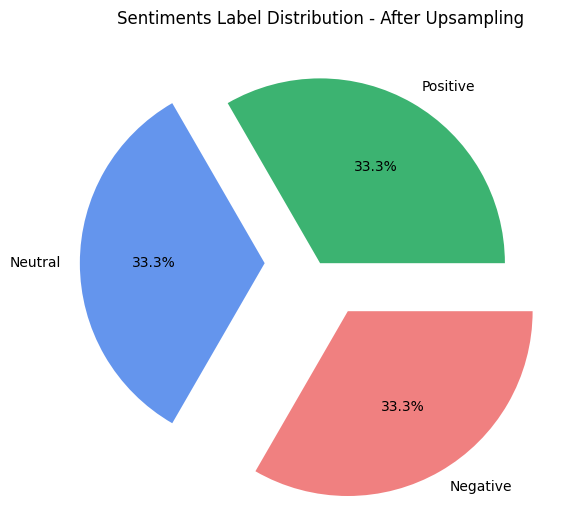

In [21]:
# Sentiments Label Distribution - After Upsampling

sorted_counts = dict(sorted(resampled_counts.items(), key=lambda item: item[1], reverse=True))
explode_values = [0, 0.3, 0.3]
colors = ['mediumseagreen', 'cornflowerblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(sorted_counts.values(), labels=sorted_counts.keys(), colors=colors, autopct='%1.1f%%', explode=explode_values)
ax.set_title('Sentiments Label Distribution - After Upsampling')
ax.yaxis.set_visible(False)
plt.show()

## Preprocessing for Lexicon models

In [22]:
## Preprocessing steps for the validation 200 reviews that are in X_val and Y_val

##Preprocessing for TextBlob
def preprocessing_text_for_textblob(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass

    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])

    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    custom_stopwords = stop_words - {'not', 'no', 'nor', 'but', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)

    return processed_text

In [23]:
##Preprocessing for Vader

def preprocessing_text_for_vader(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass
    return text

In [24]:
# Applying pre-processing

sample_df['text_preprocessed_for_textblob'] = sample_df['text'].apply(preprocessing_text_for_textblob)
sample_df['text_preprocessed_for_vader'] = sample_df['text'].apply(preprocessing_text_for_vader)
sample_df.head(20)

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader
2813,5,family will love it Five Stars,Positive,family love Five Stars,family will love it Five Stars
811,5,its just a gift card Five Stars,Positive,gift card Five Stars,its just a gift card Five Stars
703,5,good place Five Stars,Positive,good place Five Stars,good place Five Stars
788,5,Gift card just as expected Its a gift card,Positive,Gift card expected gift card,Gift card just as expected Its a gift card
1253,5,great gifts Five Stars,Positive,great gifts Five Stars,great gifts Five Stars
2135,5,"E-cards, what an awesome invention. Instant delivery and you can send as a gift. Seller is always reliable. Super! I love these e-cards.",Positive,Ecards awesome invention Instant delivery send gift Seller always reliable Super love ecards,"E-cards, what an awesome invention. Instant delivery and you can send as a gift. Seller is always reliable. Super! I love these e-cards."
1538,5,Like them haven't use them yet Five Stars,Positive,Like not use yet Five Stars,Like them haven't use them yet Five Stars
2579,5,"I bought this for my nephews graduation, he said it works It works",Positive,bought nephews graduation said works works,"I bought this for my nephews graduation, he said it works It works"
435,5,Worked as it should Worked as it should,Positive,Worked Worked,Worked as it should Worked as it should
592,5,Brilliant Five Stars,Positive,Brilliant Five Stars,Brilliant Five Stars


In [25]:
# Applying pre-processing for validation sample

sample_df['text_preprocessed_for_ml'] = sample_df['text'].apply(preprocessing_text_for_ml)
sample_df.head(20)

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml
2813,5,family will love it Five Stars,Positive,family love Five Stars,family will love it Five Stars,family love five star
811,5,its just a gift card Five Stars,Positive,gift card Five Stars,its just a gift card Five Stars,gift card five star
703,5,good place Five Stars,Positive,good place Five Stars,good place Five Stars,good place five star
788,5,Gift card just as expected Its a gift card,Positive,Gift card expected gift card,Gift card just as expected Its a gift card,gift card expected gift card
1253,5,great gifts Five Stars,Positive,great gifts Five Stars,great gifts Five Stars,great gift five star
2135,5,"E-cards, what an awesome invention. Instant delivery and you can send as a gift. Seller is always reliable. Super! I love these e-cards.",Positive,Ecards awesome invention Instant delivery send gift Seller always reliable Super love ecards,"E-cards, what an awesome invention. Instant delivery and you can send as a gift. Seller is always reliable. Super! I love these e-cards.",ecards awesome invention instant delivery send gift seller always reliable super love ecards
1538,5,Like them haven't use them yet Five Stars,Positive,Like not use yet Five Stars,Like them haven't use them yet Five Stars,like not use yet five star
2579,5,"I bought this for my nephews graduation, he said it works It works",Positive,bought nephews graduation said works works,"I bought this for my nephews graduation, he said it works It works",bought nephew graduation said work work
435,5,Worked as it should Worked as it should,Positive,Worked Worked,Worked as it should Worked as it should,worked worked
592,5,Brilliant Five Stars,Positive,Brilliant Five Stars,Brilliant Five Stars,brilliant five star


In [26]:
##Preprocessing for ML models

X_val_textblob = sample_df['text_preprocessed_for_textblob']
X_val_vader = sample_df['text_preprocessed_for_vader']
X_val_tfidf = tfidf.transform(sample_df['text_preprocessed_for_ml'])
y_val = sample_df['label']

print("Shape of DF data (X) (y):", X_val_tfidf.shape, y_val.shape)

Shape of DF data (X) (y): (200, 1731) (200,)


## Models

In [27]:
# 10.b. Build two sentiment analysis models using 70% of the data.

In [28]:
# Model 1: Logistic Regression

lr_model = LogisticRegression(class_weight="balanced", max_iter=500)
lr_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 2: Support Vector Machine (SVM)

svm_model = SVC(class_weight='balanced',  max_iter=10000)
svm_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 3: Naive Bayes

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 4: Gradient Boosting

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf_resampled, y_train_resampled)

GradientBoostingClassifier()

In [29]:
print("Training Accuracy - Logistic Regression: ", lr_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Support Vector Machine (SVM): ", svm_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Naive Bayes: ", nb_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Gradient Boosting: ", gb_model.score(X_train_tfidf_resampled, y_train_resampled))

Training Accuracy - Logistic Regression:  0.9985970819304153
Training Accuracy - Support Vector Machine (SVM):  0.9997194163860831
Training Accuracy - Naive Bayes:  0.98989898989899
Training Accuracy - Gradient Boosting:  1.0


In [30]:
# 12. Testing: Test out the two models using the 30% test data note the accuracy, precision, recall and F1 score.

def model_evaluation(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    cnf_matrix = confusion_matrix(y_test, predictions)

    return accuracy, precision, recall, f1, cnf_matrix

In [31]:
# Test Model 1: Logistic Regression

#Make predictions on test data
lr_pred = lr_model.predict(X_test_tfidf)

lr_results = model_evaluation(lr_pred, y_test)

print("Test Model 1: Logistic Regression")
print("Accuracy: ", lr_results[0])
print("Precision: ", lr_results[1])
print("Recall: ", lr_results[2])
print("F1: ", lr_results[3])
print("Confusion Matrix: \n", lr_results[4])


Test Model 1: Logistic Regression
Accuracy:  0.982824427480916
Precision:  0.9829834605597965
Recall:  0.982824427480916
F1:  0.9825517993456926
Confusion Matrix: 
 [[  5   0   1]
 [  1   4   3]
 [  2   2 506]]


In [32]:
# Test Model 2: Support Vector Machine (SVM)

#Make predictions on test data
svm_pred = svm_model.predict(X_test_tfidf)

svm_results = model_evaluation(svm_pred, y_test)

print("Test Model 2: Support Vector Machine (SVM)")
print("Accuracy: ", svm_results[0])
print("Precision: ", svm_results[1])
print("Recall: ", svm_results[2])
print("F1: ", svm_results[3])
print("Confusion Matrix: \n", svm_results[4])

Test Model 2: Support Vector Machine (SVM)
Accuracy:  0.9770992366412213
Precision:  0.970432717057171
Recall:  0.9770992366412213
F1:  0.9712923585216777
Confusion Matrix: 
 [[  1   0   5]
 [  1   2   5]
 [  0   1 509]]


In [33]:
# Test Model 3: Naive Bayes

#Make predictions on test data
nb_pred = nb_model.predict(X_test_tfidf)

nb_results = model_evaluation(nb_pred, y_test)

print("Test Model 3: Naive Bayes")
print("Accuracy: ", nb_results[0])
print("Precision: ", nb_results[1])
print("Recall: ", nb_results[2])
print("F1: ", nb_results[3])
print("Confusion Matrix: \n", nb_results[4])

Test Model 3: Naive Bayes
Accuracy:  0.9465648854961832
Precision:  0.9679399518308364
Recall:  0.9465648854961832
F1:  0.955836846302837
Confusion Matrix: 
 [[  3   0   3]
 [  1   4   3]
 [  8  13 489]]


In [34]:
# Test Model 4: Gradient Boosting

#Make predictions on test data
gb_pred = gb_model.predict(X_test_tfidf)

gb_results = model_evaluation(gb_pred, y_test)

print("Test Model 4: Gradient Boosting")
print("Accuracy: ", gb_results[0])
print("Precision: ", gb_results[1])
print("Recall: ", gb_results[2])
print("F1: ", gb_results[3])
print("Confusion Matrix: \n", gb_results[4])

Test Model 4: Gradient Boosting
Accuracy:  0.9732824427480916
Precision:  0.9714336832061069
Recall:  0.9732824427480916
F1:  0.9715819403156013
Confusion Matrix: 
 [[  4   0   2]
 [  0   2   6]
 [  4   2 504]]


## Comparison between Lexicon Model VS ML models

In [35]:
# 13. Design an experiment to compare the test results of the Lexicon model versus the two machine learning models:

In [36]:
# Function to get sentiment from polarity for TextBlob

def get_sentiment_text_byTextBlob(text):
    text_analyzer = TextBlob(text)
    sentiment_score = text_analyzer.sentiment.polarity

    if -0.2 <= sentiment_score <= 0.2:
        return 'Neutral'
    elif sentiment_score > 0.2:
        return 'Positive'
    else:
        return 'Negative'

# Function to get sentiment from polarity for Vader

def get_sentiment_text_byVader(text):
    text_analyzer = SentimentIntensityAnalyzer()
    sentiment_score = text_analyzer.polarity_scores(text)['compound']

    if -0.2 <= sentiment_score <= 0.2:
        return 'Neutral'
    elif sentiment_score > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [37]:
# Get the prediction values from the Lexicon models


In [38]:
# Test Lexicon Model 1: TextBlob

# TextBlob Lexicon Model
textblob_pred = [get_sentiment_text_byTextBlob(text) for text in X_val_textblob]

textblob_results = model_evaluation(textblob_pred, y_val)

print("Test Lexicon Model 1: TextBlob")
print("Accuracy: ", textblob_results[0])
print("Precision: ", textblob_results[1])
print("Recall: ", textblob_results[2])
print("F1: ", textblob_results[3])
print("Confusion Matrix: \n", textblob_results[4])

Test Lexicon Model 1: TextBlob
Accuracy:  0.685
Precision:  0.9566614906832299
Recall:  0.685
F1:  0.7949849849849849
Confusion Matrix: 
 [[  2   0   0]
 [  0   0   3]
 [  5  55 135]]


In [39]:
# Test Lexicon Model 2: Vader

# Vader Lexicon Model
vader_pred = [get_sentiment_text_byVader(text) for text in X_val_vader]

vader_results = model_evaluation(vader_pred, y_val)

print("Test Lexicon Model 2: Vader")
print("Accuracy: ", vader_results[0])
print("Precision: ", vader_results[1])
print("Recall: ", vader_results[2])
print("F1: ", vader_results[3])
print("Confusion Matrix: \n", vader_results[4])

Test Lexicon Model 2: Vader
Accuracy:  0.885
Precision:  0.95875
Recall:  0.885
F1:  0.9203999999999999
Confusion Matrix: 
 [[  0   2   0]
 [  0   0   3]
 [  2  16 177]]


In [40]:
# Test ML Model 1: Logistic Regression

#Make predictions on test data
lr_pred = lr_model.predict(X_val_tfidf)

lr_results = model_evaluation(lr_pred, y_val)

print("Test Model 1: Logistic Regression")
print("Accuracy: ", lr_results[0])
print("Precision: ", lr_results[1])
print("Recall: ", lr_results[2])
print("F1: ", lr_results[3])
print("Confusion Matrix: \n", lr_results[4])


Test Model 1: Logistic Regression
Accuracy:  0.99
Precision:  0.9901015228426395
Recall:  0.99
F1:  0.9886921768707482
Confusion Matrix: 
 [[  1   0   1]
 [  0   2   1]
 [  0   0 195]]


In [41]:
# Test ML Model 2: Support Vector Machine (SVM)

#Make predictions on test data
svm_pred = svm_model.predict(X_val_tfidf)

svm_results = model_evaluation(svm_pred, y_val)

print("Test Model 2: Support Vector Machine (SVM)")
print("Accuracy: ", svm_results[0])
print("Precision: ", svm_results[1])
print("Recall: ", svm_results[2])
print("F1: ", svm_results[3])
print("Confusion Matrix: \n", svm_results[4])

Test Model 2: Support Vector Machine (SVM)
Accuracy:  0.985
Precision:  0.9852272727272728
Recall:  0.985
F1:  0.9817239185750637
Confusion Matrix: 
 [[  1   0   1]
 [  0   1   2]
 [  0   0 195]]


## State of the Art Model

4.3 Rating profile—enhancing ratings with reviews
In another sub-branch of research, investigators assume that both reviews and real
ratings are available in a particular scenario, in which reviews act as an auxiliary
resource to enhance ratings. Some of these approaches stress that using reviews can
be helpful for dealing with the cold-start problem, since relying on only a few ratings
provided by new users might prevent the recommender from returning satisfactory
results (McAuley and Leskovec 2013; Seroussi et al. 2011)

We are choosing “Rating Profile - Inferring Ratings from Reviews” approach for implementation.

Diagram Concept:
    
    1. Review Text Input: Input reviews from users.
    2. Sentiment Analysis: Perform sentiment analysis on each review.
    3. Infer Ratings: Convert sentiment scores to a rating scale (e.g., 1-5).
    4. Aggregate Ratings: Combine these inferred ratings with existing numerical ratings.


In [42]:
sample_df.head()

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml
2813,5,family will love it Five Stars,Positive,family love Five Stars,family will love it Five Stars,family love five star
811,5,its just a gift card Five Stars,Positive,gift card Five Stars,its just a gift card Five Stars,gift card five star
703,5,good place Five Stars,Positive,good place Five Stars,good place Five Stars,good place five star
788,5,Gift card just as expected Its a gift card,Positive,Gift card expected gift card,Gift card just as expected Its a gift card,gift card expected gift card
1253,5,great gifts Five Stars,Positive,great gifts Five Stars,great gifts Five Stars,great gift five star


In [43]:
text_df.head()

,overall,text,label,text_preprocessed
494,5,Son loved this! Five Stars,Positive,son loved five star
1281,3,"I thought this would be a hit for several people but not so. The quality differs tremendously by store. For instance, the one in Highlands, N. C. is excellent - ingredients always fresh; very clean, etc. We stopped at several in Fla. and were very disappointed. The veggies looks ""whipped out"" and the over-all ambience of the place was negative. No ore SUBWAY gift certs. Bummer",Neutral,thought would hit several people but not quality differs tremendously store instance one highland n c excellent ingredient always fresh clean etc stopped several fla disappointed veggie look whipped overall ambience place negative no ore subway gift cert bummer
1243,5,Works as advertised Works as advertised,Positive,work advertised work advertised
2242,5,Love it thank u,Positive,love thank
2185,4,"easy to use on their website, for a great online quick pick up. There food was okay, but not for the price. Easy to use",Positive,easy use website great online quick pick food okay but not price easy use


In [44]:
# Get the new X, y Values

text_df_sota_X = text_df['text_preprocessed']
text_df_sota_y = text_df['overall']
# 10.a. Split the data into 70% for training and 30% for testing

X_train_sota, X_test_sota, y_train_sota, y_test_sota = train_test_split(text_df_sota_X, text_df_sota_y, test_size=0.3, stratify=text_df_sota_y, random_state=random_state)

print("Shape of training data (X) (y):", X_train_sota.shape, y_train_sota.shape)
print("Shape of testing data (X) (y):", X_test_sota.shape, y_test_sota.shape)

Shape of training data (X) (y): (1222,) (1222,)
Shape of testing data (X) (y): (524,) (524,)


In [45]:
# Apply Feature extraction using TF-IDF

tfidf_sota = TfidfVectorizer()
X_train_sota_tfidf = tfidf_sota.fit_transform(X_train_sota)
X_test_sota_tfidf = tfidf_sota.transform(X_test_sota)

X_val_sota_tfidf = tfidf_sota.transform(sample_df['text_preprocessed_for_ml'])
y_val_sota = sample_df['overall']

print("Shape of DF data (X) (y):", X_val_tfidf.shape, y_val.shape)
print("Shape of Validation data (X) (y):", X_val_sota_tfidf.shape, y_val_sota.shape)

sampled_counts_sota = Counter(y_train_sota)
print("Counter of original sampled set", sampled_counts_sota)

Shape of DF data (X) (y): (200, 1731) (200,)
Shape of Validation data (X) (y): (200, 1775) (200,)
Counter of original sampled set Counter({5: 1112, 4: 77, 3: 19, 1: 8, 2: 6})


In [46]:
# Oversampling to balance the data using minority to increase

sampler_sota = RandomOverSampler(random_state=random_state)

# Resample the data
X_train_sota_tfidf_resampled, y_train_sota_resampled = sampler_sota.fit_resample(X_train_sota_tfidf, y_train_sota)

# Print the number of samples in each set after resampling
print(f"# resampled samples: {len(y_train_sota_resampled)}")

# Print the number of samples per class after resampling
resampled_counts_sota = Counter(y_train_sota_resampled)
print("Counter of resampled set", resampled_counts_sota)

# resampled samples: 5560
Counter of resampled set Counter({5: 1112, 3: 1112, 4: 1112, 1: 1112, 2: 1112})


In [47]:
# Model 1: Logistic Regression

lr_model_sota = LogisticRegression(class_weight="balanced", max_iter=500)
lr_model_sota.fit(X_train_sota_tfidf_resampled, y_train_sota_resampled)

# Model 2: Support Vector Machine (SVM)

svm_model_sota = SVC(class_weight='balanced',  max_iter=10000)
svm_model_sota.fit(X_train_sota_tfidf_resampled, y_train_sota_resampled)

SVC(class_weight='balanced', max_iter=10000)

In [48]:
print("Accuracy - Logistic Regression: ", lr_model_sota.score(X_train_sota_tfidf_resampled, y_train_sota_resampled))
print("Accuracy - Support Vector Machine (SVM): ", svm_model_sota.score(X_train_sota_tfidf_resampled, y_train_sota_resampled))

Accuracy - Logistic Regression:  0.9955035971223022
Accuracy - Support Vector Machine (SVM):  0.999820143884892


In [49]:
# Predicting ratings using Linear Regression model
inferred_rating_lr = lr_model_sota.predict(X_test_sota_tfidf)
inferred_rating_svm = svm_model_sota.predict(X_test_sota_tfidf)

In [50]:
best_weights = None
lowest_mse = float('inf')  # Initialize the lowest MSE with a very high value

# Grid search for weights
for alpha in range(0, 11):
    svm_weight = alpha / 10
    lr_weight = 1 - svm_weight

    # Combine predictions using a linear combination
    enhanced_rating = (svm_weight * inferred_rating_svm) + (lr_weight * inferred_rating_lr)

    # Calculate MSE
    mse = mean_squared_error(y_test_sota, enhanced_rating)

    # Check if this MSE is the lowest found so far
    if mse < lowest_mse:
        lowest_mse = mse
        best_weights = (svm_weight, lr_weight)

print("Best Weights:", best_weights)

Best Weights: (0.4, 0.6)


In [51]:
# Combine predictions using a linear combination
# You can adjust the weights according to your needs
enhanced_rating = (0.4 * inferred_rating_svm) + (0.6 * inferred_rating_lr)

# Evaluate the performance of combined predictions if you have ground truth for test ratings
# You can use metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

mse = mean_squared_error(y_test_sota, enhanced_rating)
print("MSE on the testing data:", mse)

MSE on the testing data: 0.2150381679389313


In [52]:
# Predicting ratings using SVM and Gradient Boost model
inferred_rating_lr = lr_model_sota.predict(X_val_sota_tfidf)
inferred_rating_svm = svm_model_sota.predict(X_val_sota_tfidf)
#inferred_rating_gb = gb_model_sota.predict(X_val_sota_tfidf)

# Combine predictions using a linear combination
enhanced_rating = (0.4 * inferred_rating_svm) + (0.6 * inferred_rating_lr)


# Evaluate the performance of combined predictions on the ground truth for test ratings
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val_sota, enhanced_rating)
print("MSE on the separate 200 reviews:", mse)

MSE on the separate 200 reviews: 0.153


In [53]:
sample_df['enhanced_rating'] = enhanced_rating.round().astype(int)
sample_df['enhaced_label'] = sample_df['enhanced_rating'].apply(label_rating)

sample_df

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml,enhanced_rating,enhaced_label
2813,5,family will love it Five Stars,Positive,family love Five Stars,family will love it Five Stars,family love five star,5,Positive
811,5,its just a gift card Five Stars,Positive,gift card Five Stars,its just a gift card Five Stars,gift card five star,5,Positive
703,5,good place Five Stars,Positive,good place Five Stars,good place Five Stars,good place five star,5,Positive
788,5,Gift card just as expected Its a gift card,Positive,Gift card expected gift card,Gift card just as expected Its a gift card,gift card expected gift card,5,Positive
1253,5,great gifts Five Stars,Positive,great gifts Five Stars,great gifts Five Stars,great gift five star,5,Positive
...,...,...,...,...,...,...,...,...
1501,5,Nice to have for any gift that might come up like birthdays for grandchildren as a extra. Five Stars,Positive,Nice gift might come like birthdays grandchildren extra Five Stars,Nice to have for any gift that might come up like birthdays for grandchildren as a extra. Five Stars,nice gift might come like birthday grandchild extra five star,5,Positive
798,5,"Bought it as a gift, The recipient loved it. The recipient loved it.",Positive,Bought gift recipient loved recipient loved,"Bought it as a gift, The recipient loved it. The recipient loved it.",bought gift recipient loved recipient loved,5,Positive
987,5,Its for a gift. I am sure the person receiving is going to like it. For a gift,Positive,gift sure person receiving going like gift,Its for a gift. I am sure the person receiving is going to like it. For a gift,gift sure person receiving going like gift,5,Positive
2795,5,It is wrapped so cute. The holiday spirit,Positive,wrapped cute holiday spirit,It is wrapped so cute. The holiday spirit,wrapped cute holiday spirit,5,Positive


In [58]:
pd.set_option('display.max_colwidth', None)  # To display the full content of columns without truncation
sample_df[['overall',  'enhanced_rating', 'label', 'enhaced_label', 'text',]].sample(20)

,overall,enhanced_rating,label,enhaced_label,text
2303,5,5,Positive,Positive,Always a Great gift for any occasion Five Stars
2957,4,4,Positive,Positive,Christmas Gift Four Stars
686,5,5,Positive,Positive,I have used these for several years and it is a very classy way to give a gift card! Way to go Amazon! I have used these for several years and it is ...
1501,5,5,Positive,Positive,Nice to have for any gift that might come up like birthdays for grandchildren as a extra. Five Stars
690,3,4,Neutral,Positive,It's okay. Works fine. Some scuffs. Works fine. Some scuffs
2273,5,5,Positive,Positive,"This card made a great Christmas gift for my sister-in-law, who is very hard to choose for. A great last-minute gift"
1160,5,5,Positive,Positive,Used this as a thank you for a young lady who did some errands for me. She was really surprised and very grateful. Used this as a thank you for a young lady ...
2609,5,5,Positive,Positive,Love amazon lighting deal gift cards! These were small and super cute. Perfect for gifting! Awesome buy!
1656,5,5,Positive,Positive,Not a Starbucks fan but this made for a nice little extra gift for Christmas for the nieces who love it. Not a Starbucks fan but this made for a nice little extra gift for Christmas for the nieces who ...
2813,5,5,Positive,Positive,family will love it Five Stars
